<a href="https://colab.research.google.com/github/VentureMikey/ALK2021BD/blob/main/28818_Biostatistics_GCollab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px

In [2]:
HEART = pd.read_csv('/content/heart.csv')

In [3]:
HEART.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
HEART.shape

(303, 14)

In [5]:
HEART.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
HEART.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
HEART.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
HEART['thal'].unique()

array([1, 2, 3, 0])

In [9]:
HEART.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [10]:
HEART[HEART['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [12]:
HEART.loc[HEART['ca']==4, 'ca'] = np.NaN

In [13]:
HEART['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [14]:
HEART.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [15]:
HEART[HEART['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [16]:
HEART.loc[HEART['thal']==0, 'thal'] = np.NaN

In [17]:
HEART['thal'].unique()

array([ 1.,  2.,  3., nan])

In [18]:
HEART.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

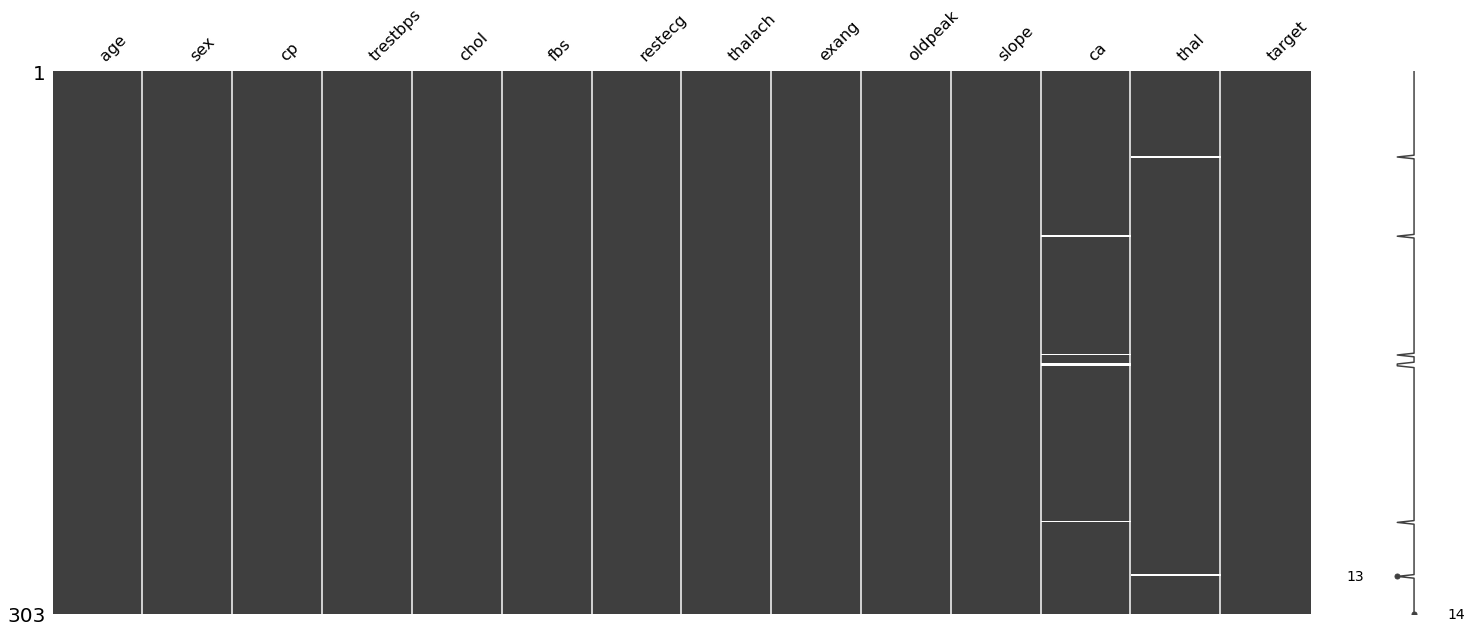

In [19]:
msno.matrix(HEART)

In [20]:
HEART=HEART.fillna(HEART.median())
HEART.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
DUPLICATED = HEART.duplicated().sum()

In [22]:
if DUPLICATED:
  print('Duplicated rows are : {}'.format(DUPLICATED))
else:
  print('There are no duplicates.')

Duplicated rows are : 1


In [23]:
DUPLICATED = HEART[HEART.duplicated(keep=False)]
DUPLICATED.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [24]:
HEART.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [25]:
HEART.corr("pearson")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.369270,0.066745,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.081241,0.211652,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.227886,-0.169125,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.100552,0.060638,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.129494,0.087866,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.140764,-0.011209,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.115499,-0.013795,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.266581,-0.115310,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.145788,0.225508,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.301067,0.210236,-0.430696


In [26]:
HEART.corr("spearman")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.099131,-0.087494,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,-0.184048,0.391643,0.084832,-0.238400
sex,-0.099131,1.000000,-0.062041,-0.052941,-0.151342,0.045032,-0.048389,-0.039868,0.141664,0.100715,-0.025010,0.091244,0.249950,-0.280937
cp,-0.087494,-0.062041,1.000000,0.035413,-0.091721,0.089775,0.065640,0.324013,-0.418256,-0.161449,0.159478,-0.243310,-0.209764,0.460860
trestbps,0.285617,-0.052941,0.035413,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,-0.086570,0.078377,0.057872,-0.121593
chol,0.195786,-0.151342,-0.091721,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,-0.012551,0.152585,0.076892,-0.120888
fbs,0.113978,0.045032,0.089775,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,-0.045786,0.131101,0.001812,-0.028046
restecg,-0.132769,-0.048389,0.065640,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,0.113661,-0.125697,-0.011454,0.148612
thalach,-0.398052,-0.039868,0.324013,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,0.436968,-0.287002,-0.167630,0.428370
exang,0.089679,0.141664,-0.418256,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,-0.274475,0.179241,0.253019,-0.436757
oldpeak,0.268291,0.100715,-0.161449,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,-0.594847,0.271526,0.253567,-0.421487


In [27]:
HEART.target.describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [28]:
HEART.cp.describe()

count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [29]:
HEART.thalach.describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [30]:
HEART.slope.describe()

count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64

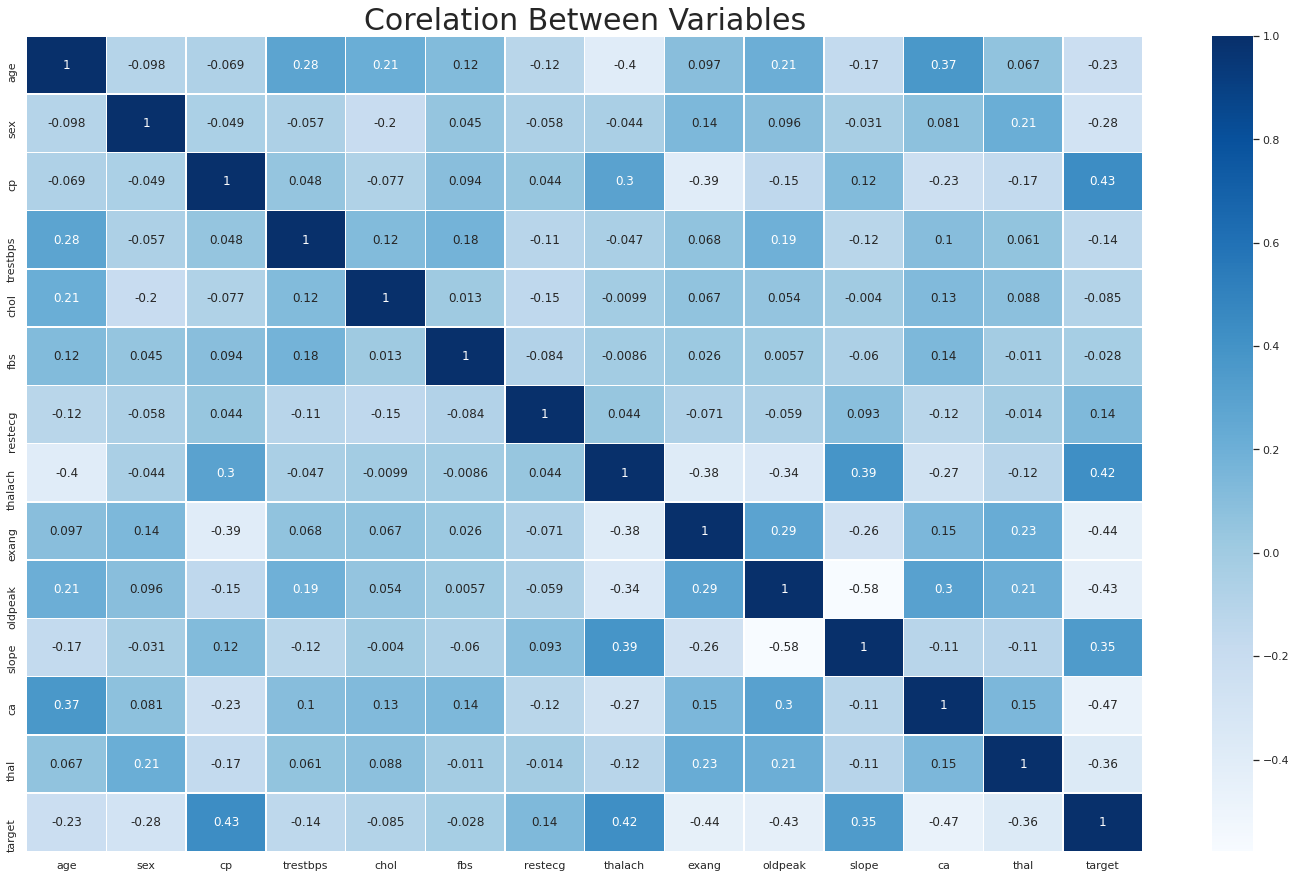

In [31]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (25, 15) 
sns.heatmap(HEART.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

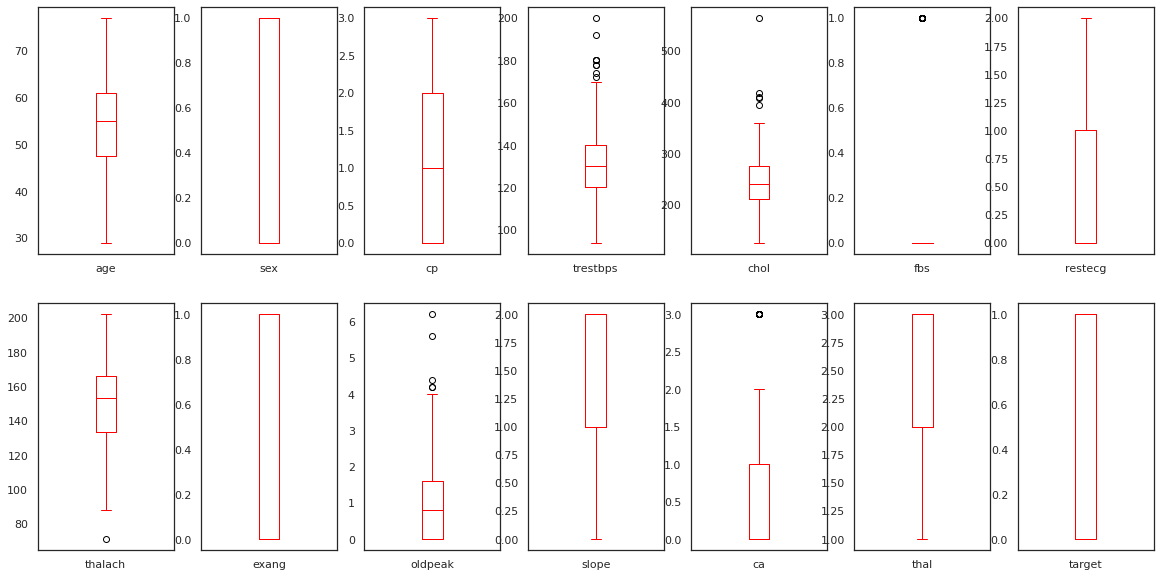

In [32]:
HEART.plot(kind='box', subplots=True, layout = (2,7),
           sharex=False, sharey=False, figsize=(20,10),
           color='red');

In [33]:
continous_features = ['age','trestbps','chol','thalach','oldpeak']
def outliers(HEART_out, drop = False):
  for each_feature in HEART_out.columns:
    feature_data = HEART_out[each_feature]
    Q1 = np.percentile(feature_data, 25.)
    Q3 = np.percentile(feature_data, 75.)
    IQR = Q3-Q1
    outlier_step = IQR * 1.5
    outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
    if not drop:
      print('For the variable {} total outliers found are {}'.format(each_feature, len(outliers)))
    if drop:
      print('Outliers from variable {} removed'.format(each_feature))

outliers(HEART[continous_features])

For the variable age total outliers found are 0
For the variable trestbps total outliers found are 9
For the variable chol total outliers found are 5
For the variable thalach total outliers found are 1
For the variable oldpeak total outliers found are 5


In [34]:
outliers(HEART[continous_features], drop = True)

Outliers from variable age removed
Outliers from variable trestbps removed
Outliers from variable chol removed
Outliers from variable thalach removed
Outliers from variable oldpeak removed


In [35]:
HEART['target'] = HEART.target.replace({0: "Disease_not_identified", 1: "Disease_identified"})
HEART['sex'] = HEART.sex.replace({1: "Male", 0: "Female"})
HEART['cp'] = HEART.cp.replace({0: "typical_angina",
                                1: "atypical_angina",
                                2: "non-anginal_pain",
                                3: "asymtomatic"})
HEART['exang'] = HEART.exang.replace({0: "No", 1: "Yes"})
HEART['fbs'] = HEART.fbs.replace({0: "False", 1: "True"})
HEART['slope'] = HEART.slope.replace({0: "upsloping", 1: "flat", 2: "downsloping"})
HEART['thal'] = HEART.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3: "normal"})

Disease_identified        165
Disease_not_identified    138
Name: target, dtype: int64


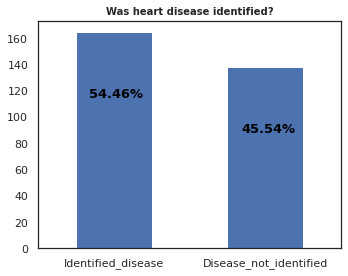

In [36]:
print(HEART.target.value_counts())

fig, ax=plt.subplots(figsize=(5,4))
name = ("Identified_disease", "Disease_not_identified")
ax = HEART.target.value_counts().plot(kind='bar')
ax.set_title("Was heart disease identified?", fontsize = 10, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize = 13,
          color = 'black', weight = 'bold')
plt.tight_layout()

Text(0.5, 1.0, 'Age Distribution Histogram')

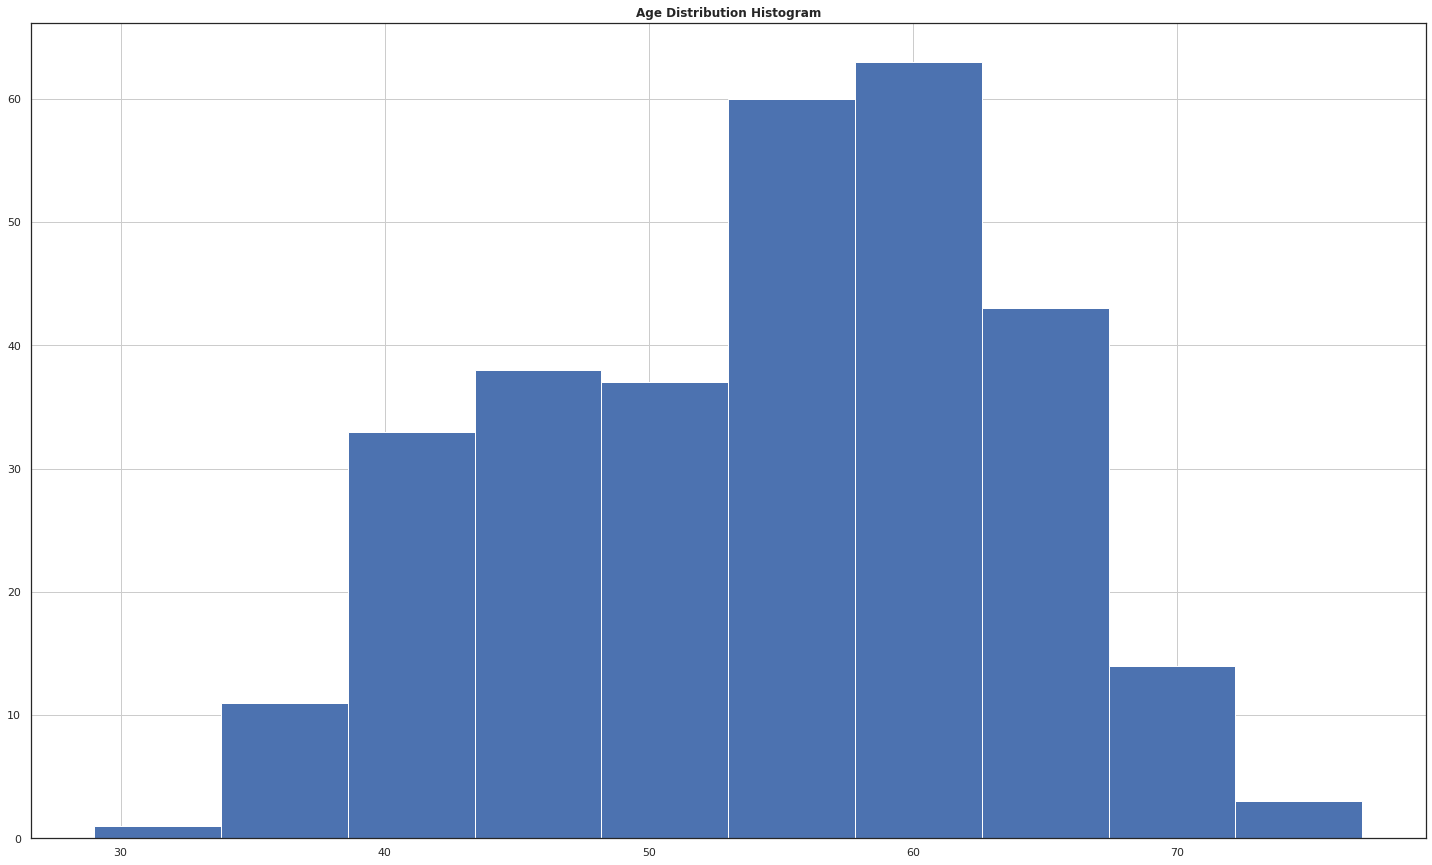

In [37]:
HEART['age'].hist().plot(kind='bar')
plt.title('Age Distribution Histogram', weight = 'bold')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
Name: age, dtype: int64


Text(0, 0.5, 'Age distribution')

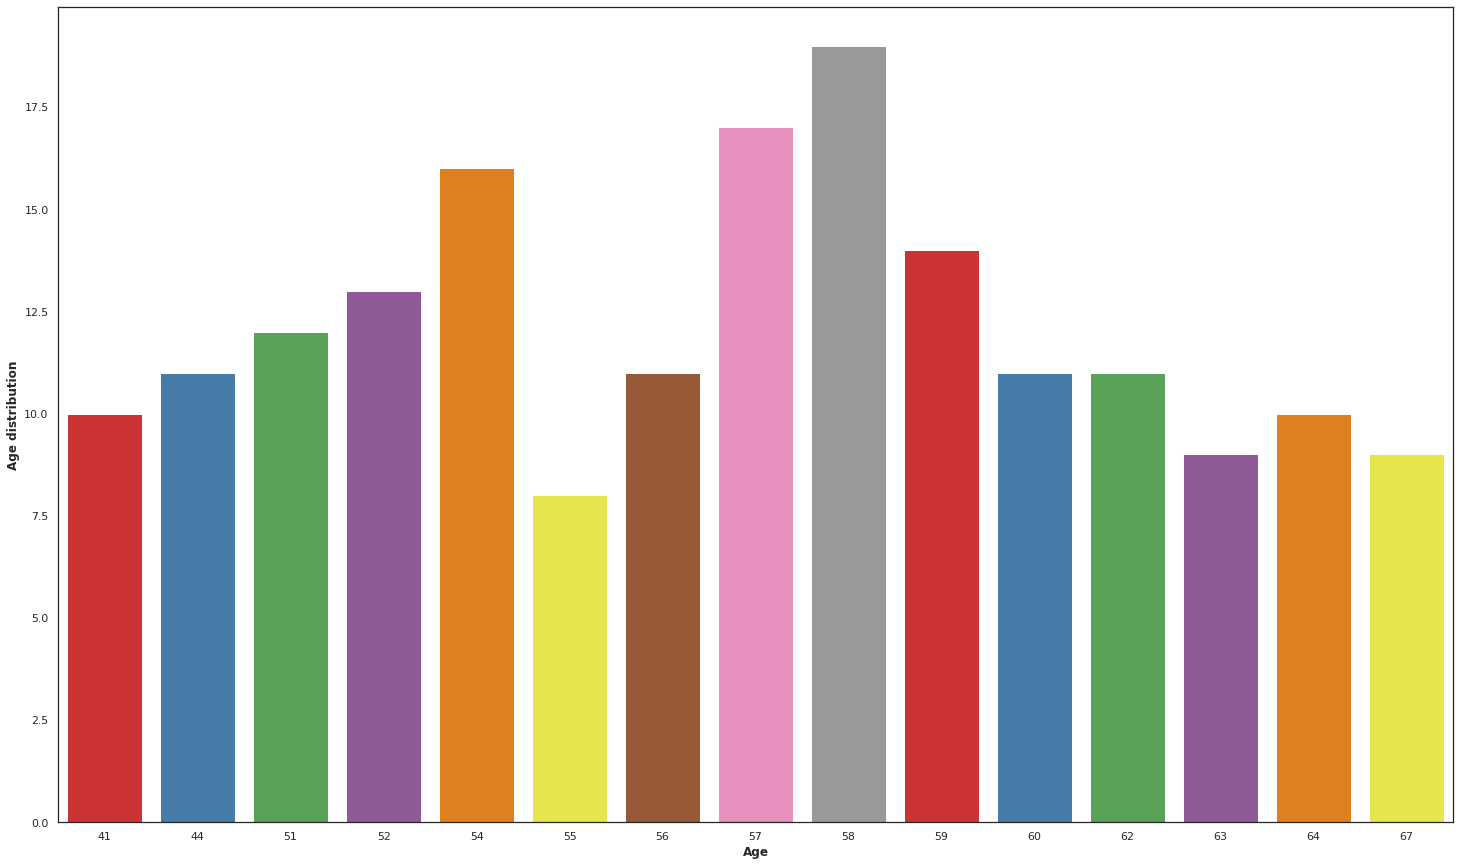

In [38]:
print(HEART.age.value_counts()[:15])
sns.barplot(x=HEART.age.value_counts()[:15].index,
y=HEART.age.value_counts()[:15].values,
palette='Set1')
plt.xlabel('Age', weight='bold')
plt.ylabel('Age distribution', weight='bold')

Male      207
Female     96
Name: sex, dtype: int64


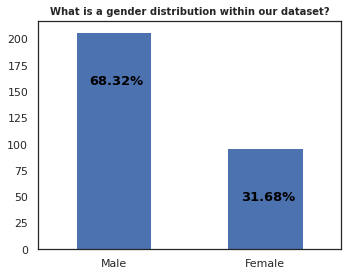

In [39]:
print(HEART.sex.value_counts())

fig, ax=plt.subplots(figsize=(5,4))
name = ("Male", "Female")
ax = HEART.sex.value_counts().plot(kind='bar')
ax.set_title("What is a gender distribution within our dataset?", fontsize = 10, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.09, i.get_height()-50, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize = 13,
          color = 'black', weight = 'bold')

plt.tight_layout()

In [40]:
HEART.sex.value_counts()

Male      207
Female     96
Name: sex, dtype: int64

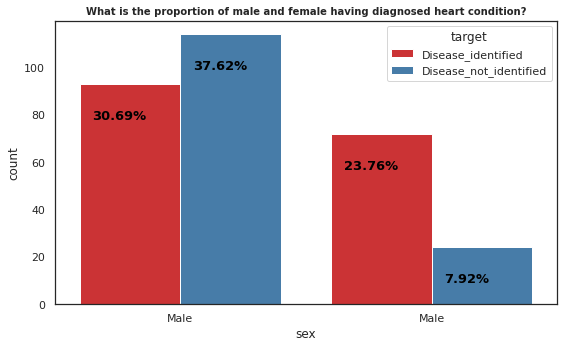

In [41]:
fig, ax=plt.subplots(figsize=(8,5))
name=HEART['sex']
ax = sns.countplot(x='sex', hue='target', data=HEART, palette='Set1')
ax.set_title("What is the proportion of male and female having diagnosed heart condition?", fontsize=10, weight='bold')
ax.set_xticklabels (name, rotation=0)

totals = []
for i in ax.patches:
  totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
  ax.text(i.get_x()+.05, i.get_height()-15,
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
          color = 'black', weight = 'bold')

plt.tight_layout()

In [42]:
HEART.cp.value_counts()

typical_angina      143
non-anginal_pain     87
atypical_angina      50
asymtomatic          23
Name: cp, dtype: int64

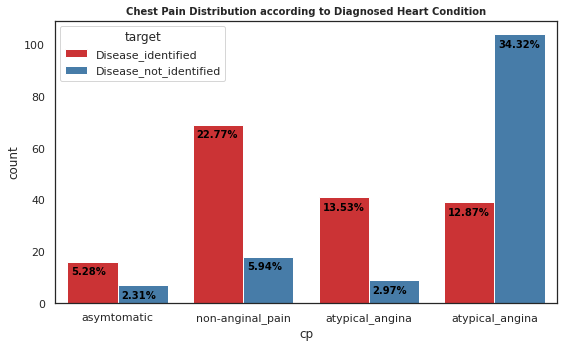

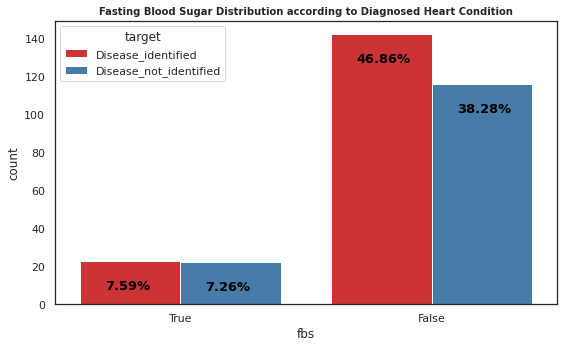

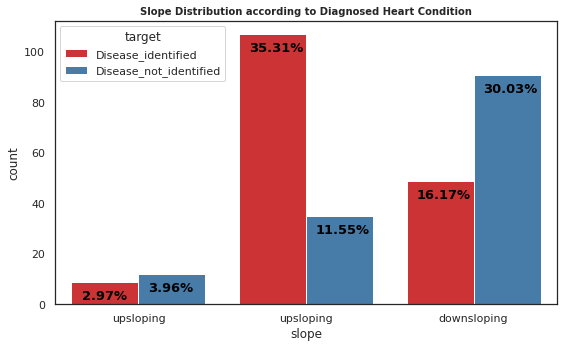

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
name = HEART['cp']
ax = sns.countplot(x='cp', hue='target', data=HEART, palette='Set1')
ax.set_title("Chest Pain Distribution according to Diagnosed Heart Condition", fontsize = 10, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black', weight = 'bold')  
plt.tight_layout()

fig, ax = plt.subplots(figsize=(8,5))
name = HEART['fbs']
ax = sns.countplot(x='fbs', hue='target', data=HEART, palette='Set1')
ax.set_title("Fasting Blood Sugar Distribution according to Diagnosed Heart Condition", fontsize = 10, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='black', weight = 'bold')  
plt.tight_layout()

fig, ax = plt.subplots(figsize=(8,5))
name = HEART['slope']
ax = sns.countplot(x='slope', hue='target', data=HEART, palette='Set1')
ax.set_title("Slope Distribution according to Diagnosed Heart Condition", fontsize = 10, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.06, i.get_height()-7,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=13,
                color='black', weight = 'bold')  
plt.tight_layout()